- Morphological operators are sets of kernals that can be achieve a variety of effects, such as reducing noise.
- Certain operaters are good at reducing black point on the white backgroung and vice-versa.
- Certain operators can also achieve an erosion and dilation effect that can add or erode from an existing image.

The basic morphological operations are: 
- Erosion 
- Dilation

<b>Erosion:</b>
- Erosion shrink-ens the image pixels i.e. it is used for shrinking of element A by using element B.
- Erosion removes pixels on object boundaries.:
- The value of the output pixel is the minimum value of all the pixels in the neighborhood. A pixel is set to 0 if any of     the neighboring pixels have the value 0. 
    
<b>Dilation:</b>
- Dilation expands the image pixels i.e. it is used for expanding an element A by using structuring element B.
- Dilation adds pixels to object boundaries.
- The value of the output pixel is the maximum value of all the pixels in the neighborhood. A pixel is set to 1 if any of     the neighboring pixels have the value 1.    

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image():
    blank_image=np.zeros((600,600))
    font=cv.FONT_HERSHEY_SIMPLEX
    cv.putText(blank_image,text='TEXAS',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=20)
    return blank_image

In [3]:
def show_image(image_path):
    fig=plt.figure(figsize=(15,12))
    ax=fig.add_subplot(111)
    ax.imshow(image_path, cmap='gray')

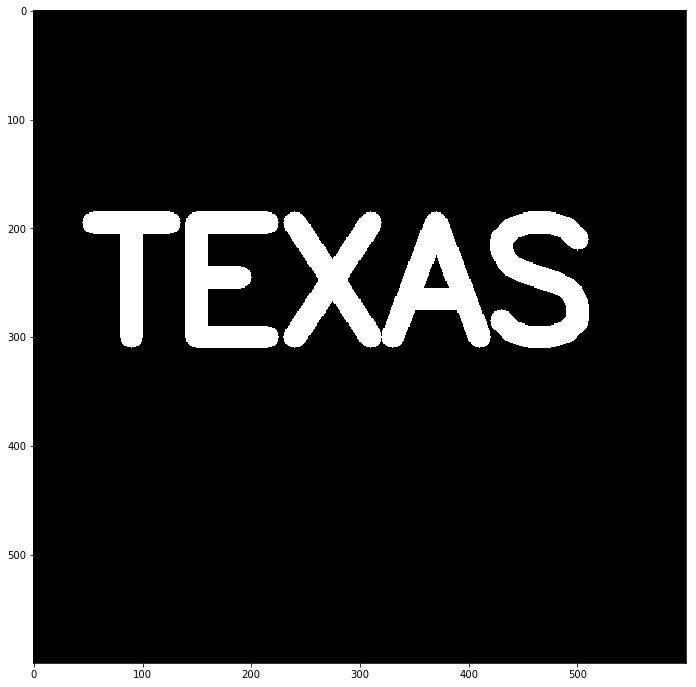

In [4]:
img=load_image()
show_image(img)

In [5]:
# Erosion

In [6]:
kernel=np.ones((5,5),dtype=np.uint8)

In [7]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

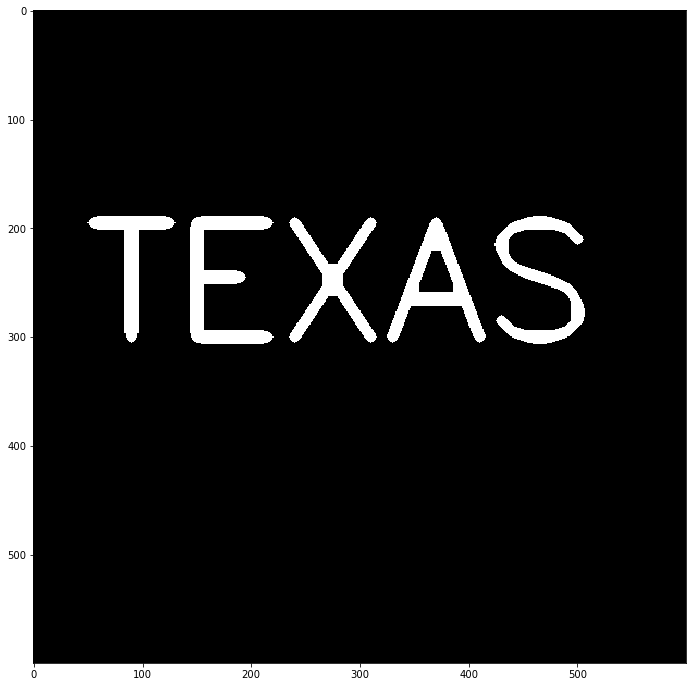

In [8]:
resulted_image=cv.erode(img,kernel,iterations=2)
show_image(resulted_image)

In [9]:
# Dilation

In [10]:
img=load_image()

In [11]:
white_noise=np.random.randint(low=0,high=2,size=(600,600))

In [12]:
white_noise

array([[1, 1, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 0]])

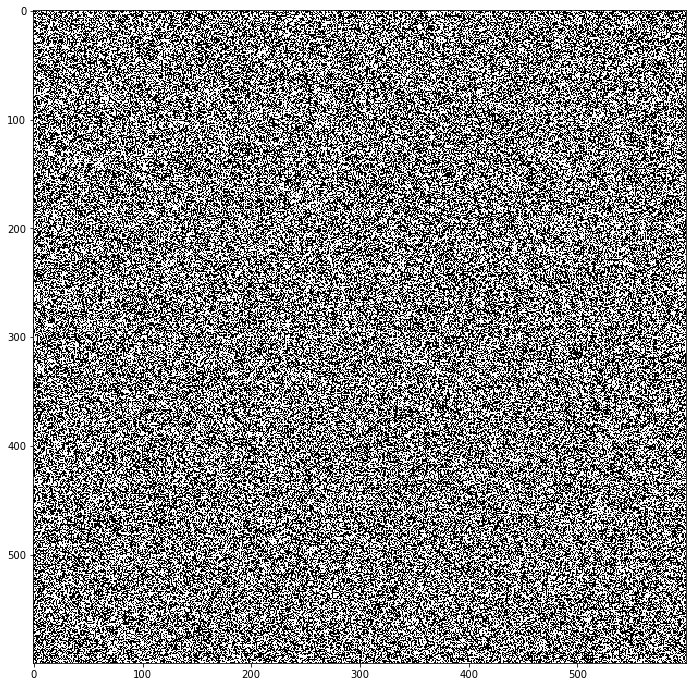

In [13]:
show_image(white_noise)

In [14]:
img.max()

255.0

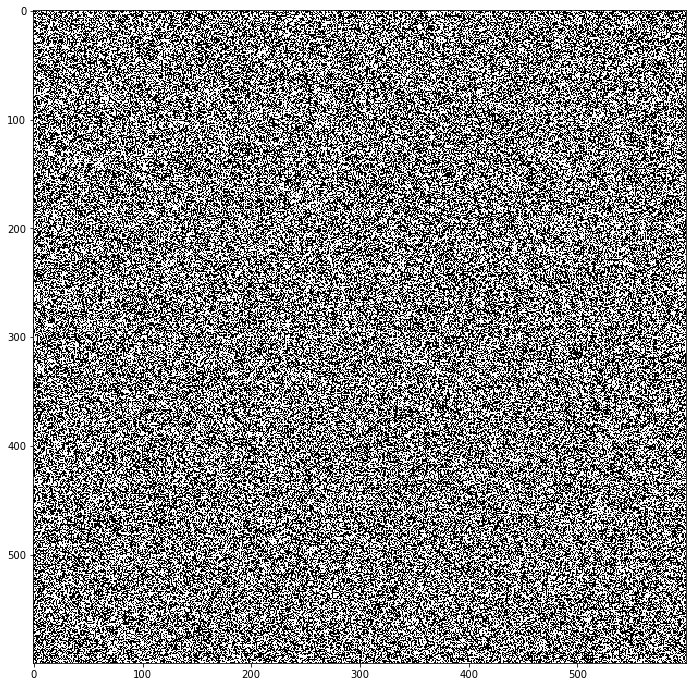

In [15]:
white_noise=white_noise*255
show_image(white_noise)

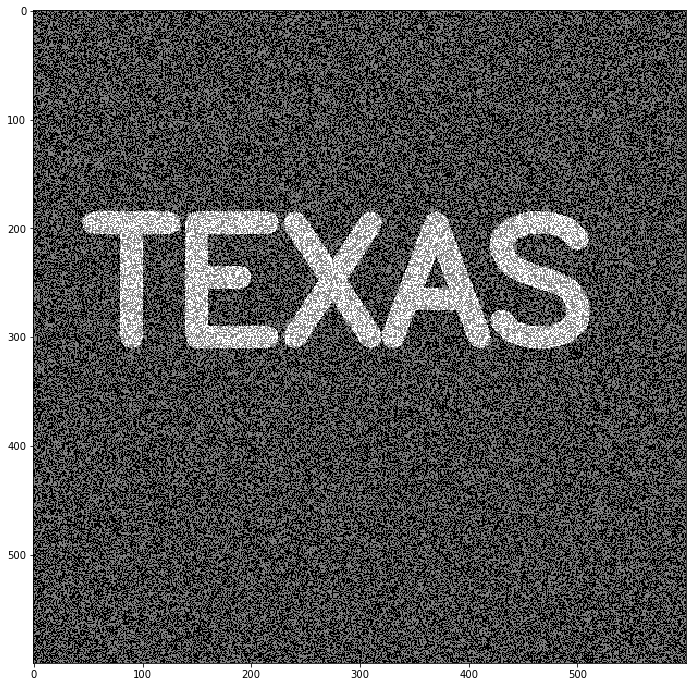

In [17]:
#adding noise to original images 
noise_image=white_noise+img
show_image(noise_image)

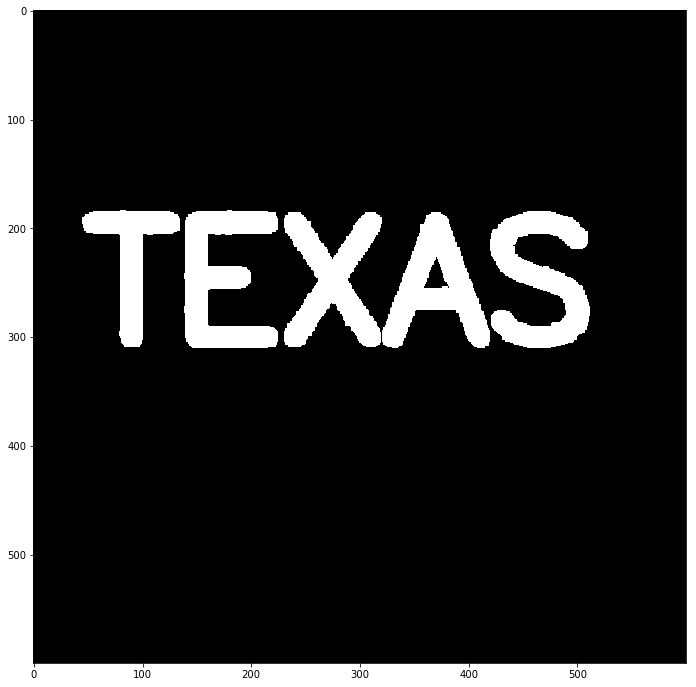

In [19]:
opening=cv.morphologyEx(noise_image,cv.MORPH_OPEN,kernel) #opening
show_image(opening)

In [40]:
img=load_image()

In [41]:
black_noise_img=np.random.randint(low=0,high=2,size=(600,600))

In [42]:
black_noise_img

array([[1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]])

In [43]:
black_noise_img=black_noise_img * -255

In [44]:
black_noise_img

array([[-255, -255,    0, ...,    0, -255, -255],
       [-255, -255, -255, ...,    0,    0,    0],
       [-255,    0, -255, ..., -255, -255, -255],
       ...,
       [-255, -255,    0, ...,    0, -255,    0],
       [-255, -255, -255, ..., -255,    0,    0],
       [   0, -255,    0, ..., -255,    0,    0]])

In [45]:
black_noise_image=img+black_noise_img

In [46]:
black_noise_image

array([[-255., -255.,    0., ...,    0., -255., -255.],
       [-255., -255., -255., ...,    0.,    0.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.],
       ...,
       [-255., -255.,    0., ...,    0., -255.,    0.],
       [-255., -255., -255., ..., -255.,    0.,    0.],
       [   0., -255.,    0., ..., -255.,    0.,    0.]])

In [47]:
black_noise_image[black_noise_image == -255]=0

In [48]:
black_noise_image.min()

0.0

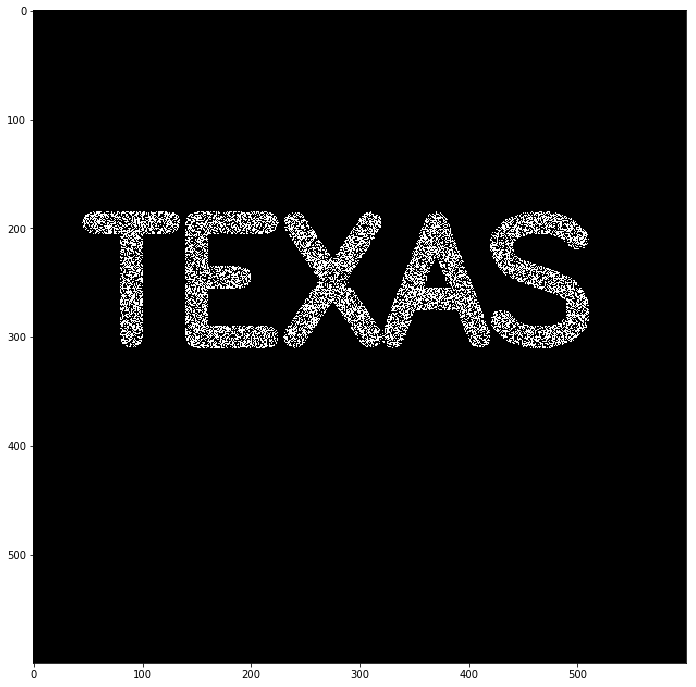

In [49]:
show_image(black_noise_image)

In [50]:
closing=cv.morphologyEx(black_noise_image,cv.MORPH_CLOSE,kernel)

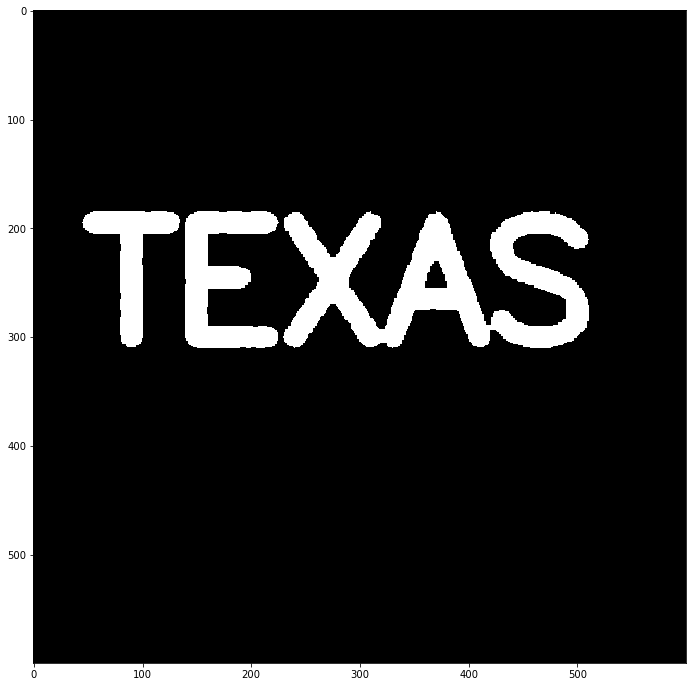

In [51]:
show_image(closing)

<b>Morphological Gradient:</b>
- During dilation operation additional pixels are added to an image boundary and, during erosion operation, additional      
  pixels are removed from image boundaries, The total number of pixels added during the dilation process depends on the     
  dimensions of the structuring element used.

- Morphological Gradient is the operation that is equal to the difference between dilation and erosion of an image. Each  
  pixel value in the resulting image indicates the contrast intensity in the nearby pixels. This is used in edge detection,   segmentation and to find the outline of an object.


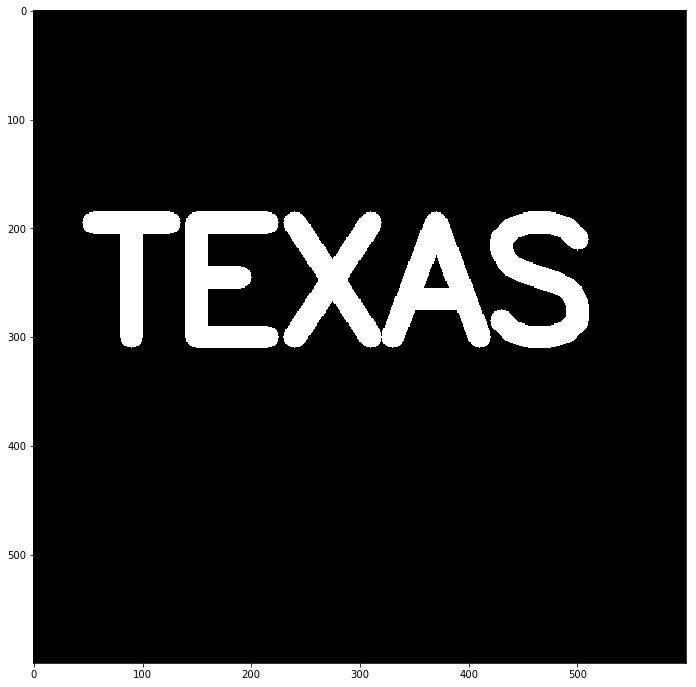

In [53]:
img=load_image()
show_image(img)

In [54]:
gradient=cv.morphologyEx(img,cv.MORPH_GRADIENT,kernel)

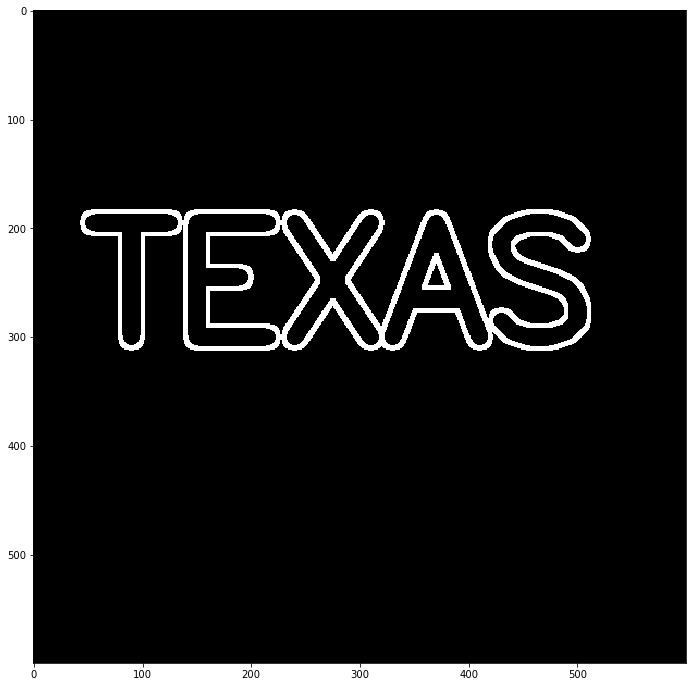

In [55]:
show_image(gradient)